# REGRESSION TREE

In [1]:
df=read.csv('C:\\Users\\abine\\OneDrive\\Documents\\Datasets\\Facebook_metrics\\dataset_Facebook.csv',sep=';')
head(df)

Page.total.likes,Type,Category,Post.Month,Post.Weekday,Post.Hour,Paid,Lifetime.Post.Total.Reach,Lifetime.Post.Total.Impressions,Lifetime.Engaged.Users,Lifetime.Post.Consumers,Lifetime.Post.Consumptions,Lifetime.Post.Impressions.by.people.who.have.liked.your.Page,Lifetime.Post.reach.by.people.who.like.your.Page,Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post,comment,like,share,Total.Interactions
139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393
139441,Status,2,12,1,9,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186


The data is related to posts' published during the year of 2014 on the Facebook's page of a renowned cosmetics brand.

Our *Objective* is to predict the Total Interactions on a Facebook post based on other features.

## EDA

In [2]:
str(df)

'data.frame':	500 obs. of  19 variables:
 $ Page.total.likes                                                   : int  139441 139441 139441 139441 139441 139441 139441 139441 139441 139441 ...
 $ Type                                                               : Factor w/ 4 levels "Link","Photo",..: 2 3 2 2 2 3 2 2 3 2 ...
 $ Category                                                           : int  2 2 3 2 2 2 3 3 2 3 ...
 $ Post.Month                                                         : int  12 12 12 12 12 12 12 12 12 12 ...
 $ Post.Weekday                                                       : int  4 3 3 2 2 1 1 7 7 6 ...
 $ Post.Hour                                                          : int  3 10 3 10 3 9 3 9 3 10 ...
 $ Paid                                                               : int  0 0 0 1 0 0 1 1 0 0 ...
 $ Lifetime.Post.Total.Reach                                          : int  2752 10460 2413 50128 7244 10472 11692 13720 11844 4694 ...
 $ Lifetime.Post.To

This dataset contains 500 rows and 19 attributes

In [3]:
df=df[-c(16:18)]

Removing comment,like and share because total.interactions is the sum of these

In [4]:
str(df)

'data.frame':	500 obs. of  16 variables:
 $ Page.total.likes                                                   : int  139441 139441 139441 139441 139441 139441 139441 139441 139441 139441 ...
 $ Type                                                               : Factor w/ 4 levels "Link","Photo",..: 2 3 2 2 2 3 2 2 3 2 ...
 $ Category                                                           : int  2 2 3 2 2 2 3 3 2 3 ...
 $ Post.Month                                                         : int  12 12 12 12 12 12 12 12 12 12 ...
 $ Post.Weekday                                                       : int  4 3 3 2 2 1 1 7 7 6 ...
 $ Post.Hour                                                          : int  3 10 3 10 3 9 3 9 3 10 ...
 $ Paid                                                               : int  0 0 0 1 0 0 1 1 0 0 ...
 $ Lifetime.Post.Total.Reach                                          : int  2752 10460 2413 50128 7244 10472 11692 13720 11844 4694 ...
 $ Lifetime.Post.To

This dataset contains 500 rows and 16 attributes

Warning message:
"package 'ggplot2' was built under R version 3.6.2"

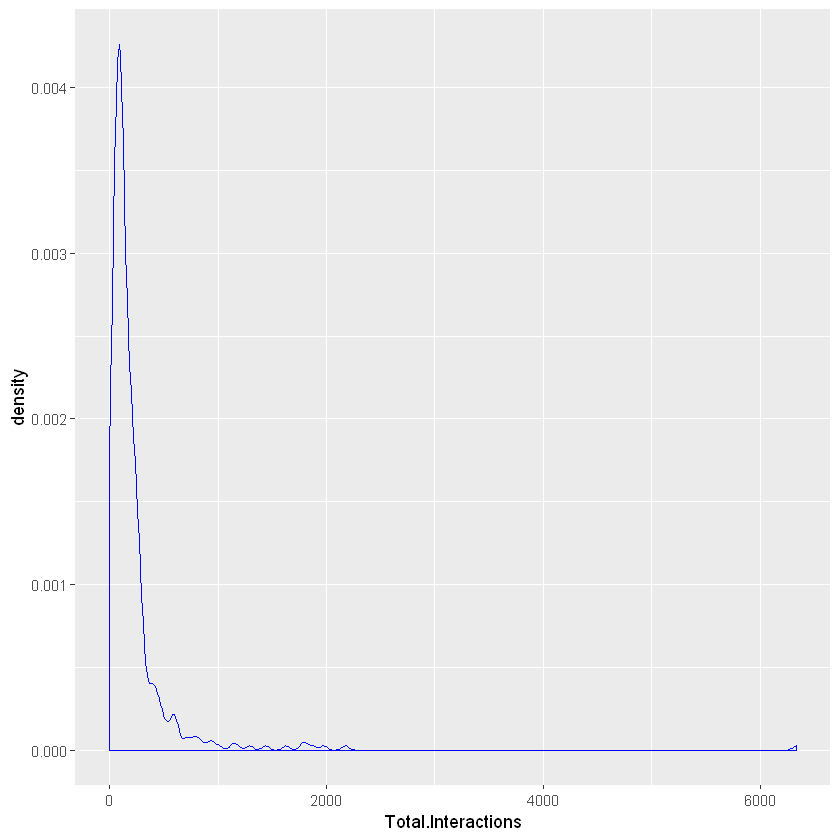

In [5]:
library(ggplot2)
ggplot(df,aes(x=Total.Interactions))+geom_density(color='blue')

There is one page with more than 6000 interactions and most pages has total interactions between 0-1000

## Spliting Train & Test data

In [6]:
library(caTools)
sample=sample.split(df$Total.Interactions,SplitRatio=0.70)
train=subset(df,sample==T)
test=subset(df,sample==F)

Warning message:
"package 'caTools' was built under R version 3.6.2"

## APPLYING REGRESSION TREE

In [7]:
library(rpart)

In [8]:
fit <- rpart(Total.Interactions ~ .,method="anova", data=train )

Our objective here is to predict Total.Interactions using regression

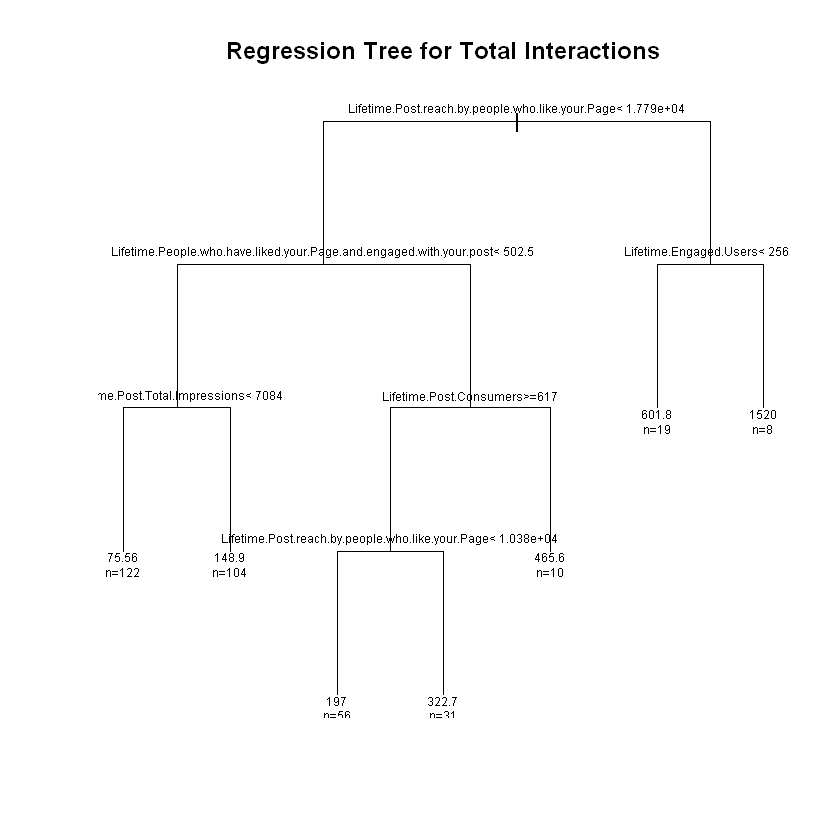

In [9]:
plot(fit,uniform=TRUE,main="Regression Tree for Total Interactions")
text(fit, use.n=TRUE, cex = 0.6)

If Lifetime.Post.Impressions.by.people.who.have.liked.your.Page >= 2.728e+04 then the Total.Interactions is 1375

If Lifetime.Post.Impressions.by.people.who.have.liked.your.Page < 2.728e+04 and Lifetime.Post.Impressions.by.people.who.have.liked.your.Page < 1.824e+04 and Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post <502.5 then the Total.Interactions is 107.7

If Lifetime.Post.Impressions.by.people.who.have.liked.your.Page < 2.728e+04 and Lifetime.Post.Impressions.by.people.who.have.liked.your.Page < 1.824e+04 and Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post >= 502.5 then the Total.Interactions is 261.6

If Lifetime.Post.Impressions.by.people.who.have.liked.your.Page < 2.728e+04 and Lifetime.Post.Impressions.by.people.who.have.liked.your.Page >= 1.824e+04 and Page.total.likes <1.323e+05 then the Total.Interactions is 380.8

If Lifetime.Post.Impressions.by.people.who.have.liked.your.Page < 2.728e+04 and Lifetime.Post.Impressions.by.people.who.have.liked.your.Page >= 1.824e+04 and Page.total.likes >= 1.323e+05 then the Total.Interactions is 920.4


Regression tree:
rpart(formula = Total.Interactions ~ ., data = train, method = "anova")

Variables actually used in tree construction:
[1] Lifetime.Engaged.Users                                             
[2] Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post
[3] Lifetime.Post.Consumers                                            
[4] Lifetime.Post.reach.by.people.who.like.your.Page                   
[5] Lifetime.Post.Total.Impressions                                    

Root node error: 29484461/350 = 84241

n= 350 

        CP nsplit rel error  xerror    xstd
1 0.435322      0   1.00000 1.00637 0.24671
2 0.160786      1   0.56468 0.63381 0.11524
3 0.055711      2   0.40389 0.53298 0.13110
4 0.015235      3   0.34818 0.47860 0.12826
5 0.010692      4   0.33295 0.49423 0.12780
6 0.010241      5   0.32225 0.49106 0.12782
7 0.010000      6   0.31201 0.49106 0.12782


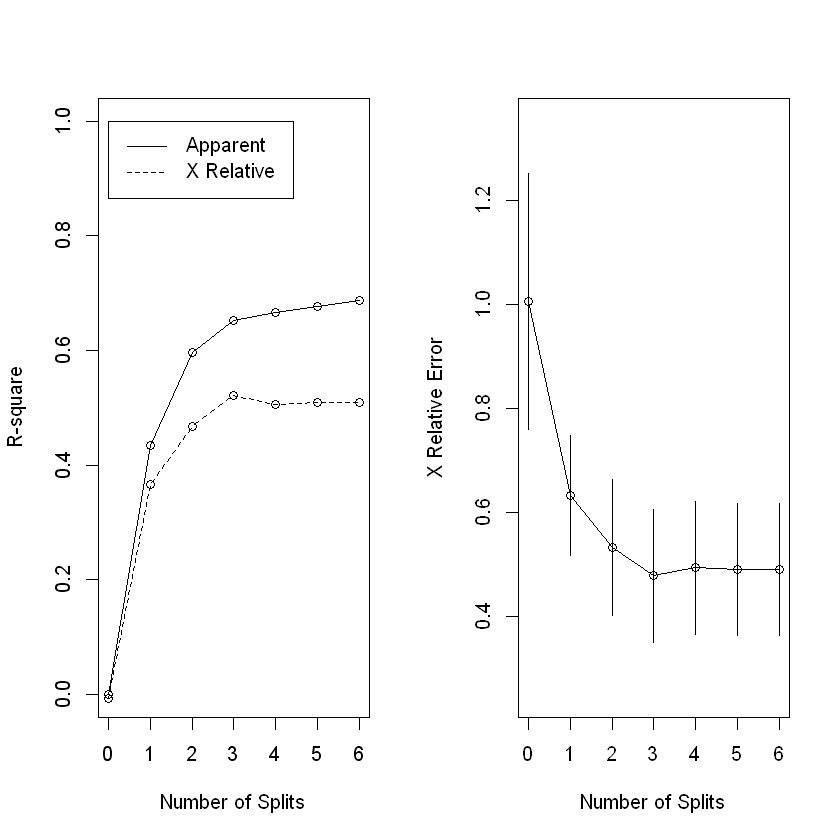

In [10]:
par(mfrow=c(1,2))
rsq.rpart(fit)

As the number of split increases R-square incrases while error decreases

This means that as number of splits increases model gets better accurracy and error in prediction

In [11]:
predictions=predict(fit,test,method='anova')
results=cbind(predictions,test$Total.Interactions)

In [12]:
colnames(results)<-c('pred','real')
results<-as.data.frame(results)

In [13]:
SSE=sum((results$pred-results$real)^2)
SST=sum((mean(df$Total.Interactions)-results$real)^2)
R2=1-SSE/SST
R2

[1] 0.3537246

• R-squared is a goodness-of-fit measure for linear regression models.

 • R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

• this model can explain only 35% of the variation.

# K-FOLDS CROSS VALIDATION

In [148]:
library(psych)
library(caret)

In [149]:
data_ctrl=trainControl(method="cv",number=8)

In [150]:
model_caret=train(Total.Interactions ~ .,
                  data=df,
                 trControl=data_ctrl, #folds
                 method="rpart",       #specifying regression model
                 na.action=na.pass) #pass missing data to model-some models will handle this

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

In [151]:
model_caret

CART 

500 samples
 15 predictor

No pre-processing
Resampling: Cross-Validated (8 fold) 
Summary of sample sizes: 438, 437, 437, 436, 438, 438, ... 
Resampling results across tuning parameters:

  cp          RMSE      Rsquared   MAE     
  0.04033847  292.2963  0.3331156  141.2928
  0.19605212  319.8480  0.2292385  151.1557
  0.27385080  328.5340  0.1743481  160.3007

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.04033847.

In [152]:
model_caret$finalModel

n= 500 

node), split, n, deviance, yval
      * denotes terminal node

1) root 500 72144030  212.1200  
  2) Lifetime.Post.reach.by.people.who.like.your.Page< 17820 459  8570768  152.7102 *
  3) Lifetime.Post.reach.by.people.who.like.your.Page>=17820 41 43816570  877.2195  
    6) Lifetime.Engaged.Users< 2944.5 33  6058507  588.0303 *
    7) Lifetime.Engaged.Users>=2944.5 8 23614070 2070.1250 *

In [153]:
model_caret$resample

RMSE,Rsquared,MAE,Resample
666.6985,0.43483314,210.4567,Fold1
166.9288,0.10225311,119.1098,Fold4
164.4799,0.76164444,110.0937,Fold3
324.3496,0.21573070,168.5520,Fold2
293.4864,0.05258471,133.5573,Fold5
182.6978,0.61532827,111.3958,Fold8
323.2881,0.23067875,151.0597,Fold7
216.4410,0.25187204,126.1171,Fold6


In [154]:
mean(model_caret$resample$Rsquared)

[1] 0.3331156

• this model can explain only 33% of the variation.

## COMPARISON

We have 35% accuraccy for Regression Tree and 33 % accurraccy for K-folds Regression Tree

Since, we take in all the data for K-folds it's gives better way to analyze the model